# Support Vector Machine

This exercise focuses on support vector machines for separating artificial data into two classes.

The artificial data will be generated using methods from the scikit-learn package ```make_blobs``` and ```make circles```



In [1]:
# Necessary imports

%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

#plotting in 3D
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

#make artificial datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

#The SVM
from sklearn.svm import SVC  

# Create color maps for the visualisation of the decision areas of the SVM
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Populating the interactive namespace from numpy and matplotlib


## Visualisation

The following function ```visualise_SVM``` illustrates the decision boundaries of the SVM, assuming a 2D problem (i.e. only 2 feature variables $x_1$ and $x_2$)
It takes as input:
   * the feature variables (e.g. from the training data x)
   * the labels (e.g. the y values to predict)
   * the instance of the SVM (to access the inner details of the trained SVM model)
   
The function shows
   * the distribution of the data points of the feature variables
   * the support vectors of the SVM
   * the margin optimized during training
   * the area which is associcated to e.g. class A and class B (according to the labels y) in the phase-space
   
The function is defined here at the top and is hence accessible throughout the exercise later on.

In [2]:
def visualise_SVM(x_data, y_data, clf):
    # Plot the decision boundary by assigning a color to each point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    x = np.linspace(x_min, x_max, 30)
    y = np.linspace(y_min, y_max, 30)
    yy,xx = np.meshgrid(y,x)
    
    #get the prediction from the classifier for the graphical illustration
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # get the distance of each point from the SVM decision boundary
    P = np.zeros_like(xx)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i,j] = clf.decision_function(np.asarray([[xi,yj]]))


    plt.figure()
    plt.title("")
    plt.xlabel("$x_1$", fontsize=25)
    plt.ylabel("$x_2$", fontsize=25)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    #plot the SVM decision boundary
    ax = plt.gca()
    ax.contour(xx, yy, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap='bwr');

    #highlight the SVM support vectors and margin violations (dark circles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150, marker='o', facecolors='black', alpha=0.5);

    

# Linear separable case

First we generate 2 "blobs" of data which are well separated (```cluster_std=1.0```). This problem should be easily solvable with a simple SVM.

Use the function ```make_blobs``` to generate features (x) and labels (y) in the following way:
```x_train, y_train = make_blobs(n_samples=500, centers=2, n_features=2, random_state=2, cluster_std=1.0)```
and visualise the resulting data using a scatter plot of the variables $x_1$ against $x_2$. Use a colour to indicate which label (y) each data-point belongs to.

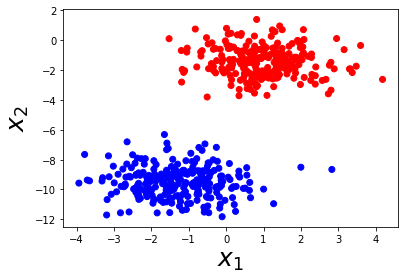

In [3]:
# note: fix the random_state to make the figure reproducible

x_train, y_train = make_blobs(n_samples=500, centers=2, n_features=2, random_state=2, cluster_std=1.0)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr');
plt.title("")
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25)
plt.show()

Now get an instance of the SVM with a linear kernel, train the SVM and use the function ```visualise_SVM``` to inspect the result.

Address the following questions:
   * Are the two "blobs" separated well?
   * Are the support vectors OK?

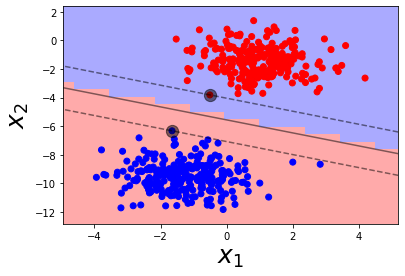

In [4]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

# Linear non-separable case

Now increase the standard variation and create new data until the two blobs are no longer easily separabel.
How does the SVM behave now?

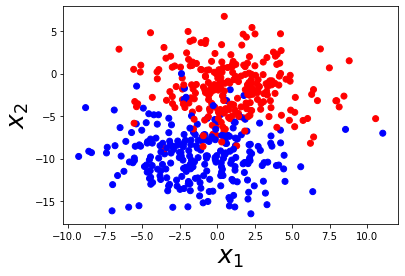

In [5]:
x_train, y_train = make_blobs(n_samples=500, centers=2, n_features=2, random_state=2, cluster_std=3.0)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr');
plt.title("")
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25)
plt.show()

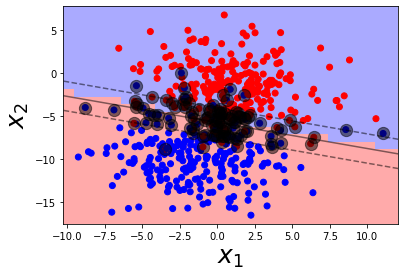

In [6]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

# Non-linear case

In this part we generate which isn't linearly separable using the ```make_circles``` method. In this case, the two classes are generated such that they each form a circle and the two circles are inside each other as shown below.

Text(0, 0.5, '$x_2$')

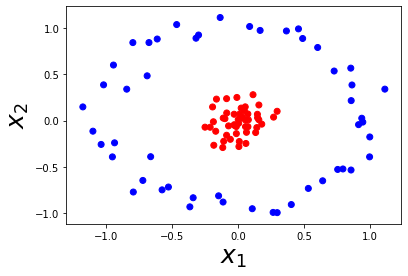

In [7]:
#data which aren't linearly separabel
x_train, y_train = make_circles(100, factor=.1, noise=.1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='bwr');
plt.title("")
plt.xlabel("$x_1$", fontsize=25)
plt.ylabel("$x_2$", fontsize=25)

Try a linear SVM and visualise the result. Can the linear SVM separate these data?

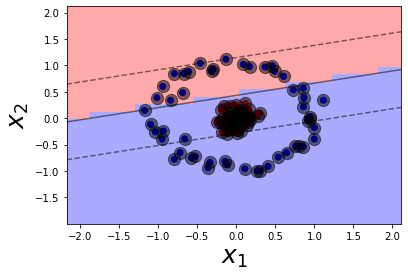

In [8]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

## SVM with polynomial kernel

Next, try a polynomial kernel for the SVM. 
Start with the default values and see if the SVM is able to separate the data. 
Then, vary the following parameters:
   * The kernel coefficient (```gamma```)
   * The degree of the polynomial (```degree```)
Can the SVM be make to classify the data correctly?

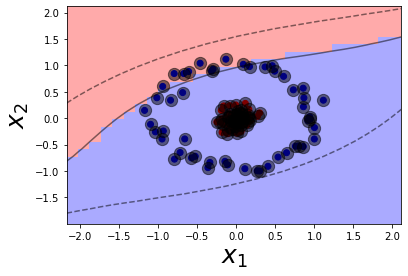

In [9]:

clf = SVC(kernel='poly', gamma='auto')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

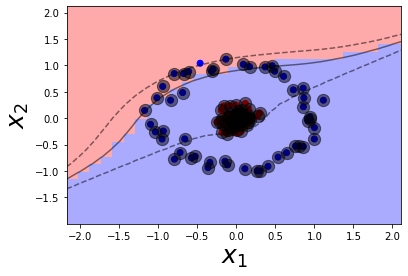

In [10]:
clf = SVC(kernel='poly', gamma = 1)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

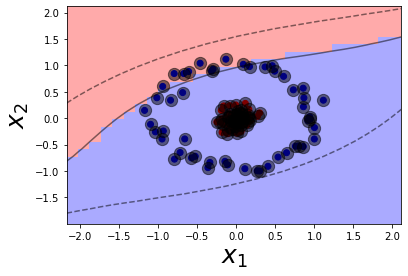

In [11]:
clf = SVC(kernel='poly', gamma = 0.5)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

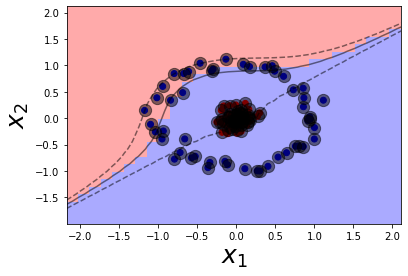

In [12]:
clf = SVC(kernel='poly', gamma = 2.0)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

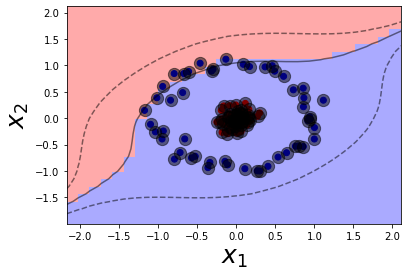

In [13]:
clf = SVC(kernel='poly', degree = 5.0, gamma='auto')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

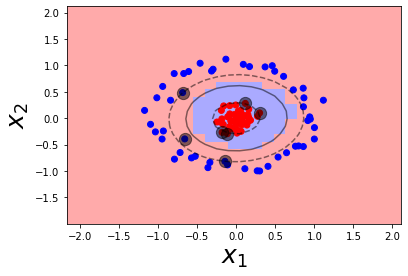

In [14]:
clf = SVC(kernel='poly', degree = 2.0, gamma=2.)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

## SVM with sigmoid kernel

Repeat the above exercise using a sigmoid as the kernel for the SVM

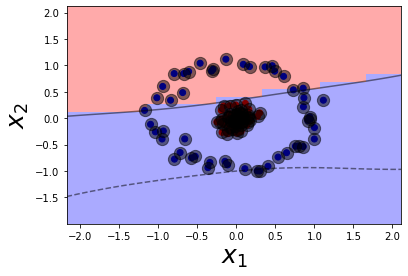

In [15]:

clf = SVC(kernel='sigmoid', gamma='auto')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

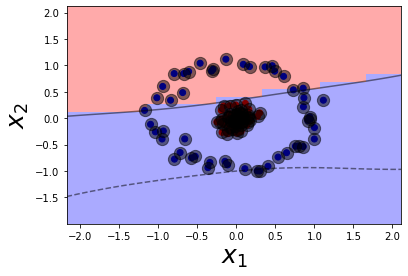

In [16]:

clf = SVC(kernel='sigmoid', gamma=0.5)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

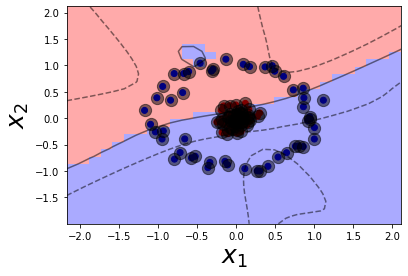

In [17]:

clf = SVC(kernel='sigmoid', gamma = 2.0)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

## Radial basis functions

One "trick" used in SVMs is to transform the such that the new data become linearly separabel. One could for example go to a higher dimensional space where the data is located differently.

Visualising the data in 3 dimensions (instead of 2) just shows that the data points are located on a plane in the phase-space:

Text(0.5, 0, 'r')

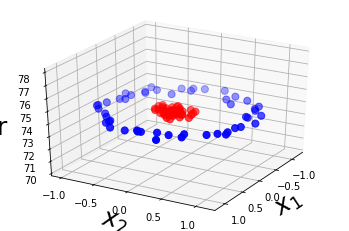

In [18]:
r = np.abs(x_train).sum()

ax = plt.subplot(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], r, c=y_train, s=50, cmap='bwr')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('$x_1$', fontsize=25)
ax.set_ylabel('$x_2$', fontsize=25)
ax.set_zlabel('r', fontsize=25)

However, each data-point can now be modified to make use of the extra (higher) dimension.
This can be done e.g. using radial basis function where the value of the function depends on the distance to the origin. This may allow to pull the classes of the data apart to be become separabel.
An example is shown below for the circular data, where each data-point is assigned an additional value in the $r$ direction according to $r = e^{-\vec{x}^2}$

This concept is not limited to 2 or 3 dimensions (although it becomes difficult or impossible to visualise this in higher dimensions)

Text(0.5, 0, 'r')

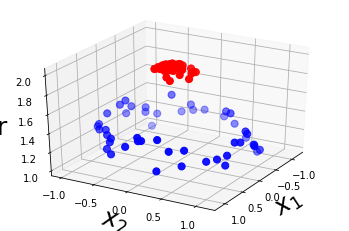

In [19]:
r = np.exp(-(x_train)**2).sum(1)
ax = plt.subplot(projection='3d')
ax.scatter3D(x_train[:, 0], x_train[:, 1], r, c=y_train, s=50, cmap='bwr')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('$x_1$', fontsize=25)
ax.set_ylabel('$x_2$', fontsize=25)
ax.set_zlabel('r', fontsize=25)

The "blue" and the "red" classes can now be separated easily, e.g. by a plane around $r=1.8$. Then all blue data are below the plane and all red data are above.

Use a SVM with a radial basis function as kernel and see if the circular data can be separated this way.

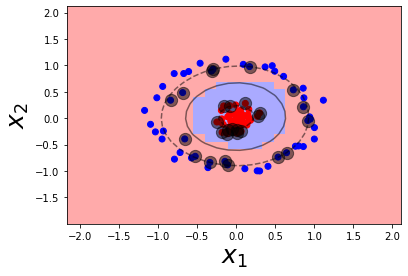

In [20]:

clf = SVC(kernel='rbf', gamma='auto')
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

Experiment with the kernel coefficient (```gamma```) and observe how the results change.

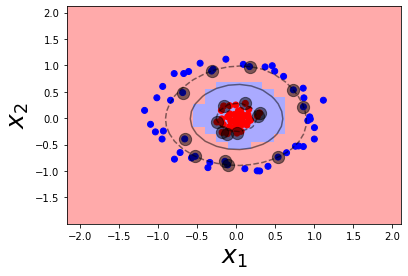

In [21]:
clf = SVC(kernel='rbf', gamma = 1.0)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

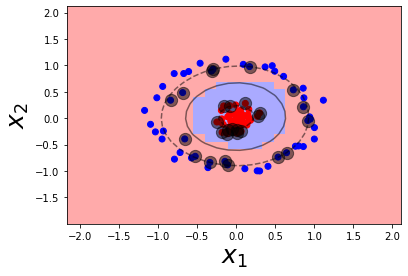

In [22]:
clf = SVC(kernel='rbf', gamma = 0.5)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)

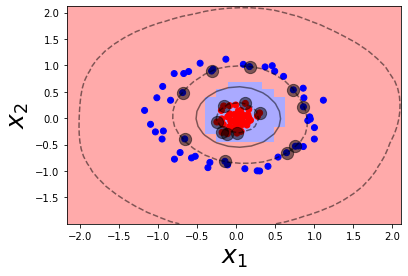

In [23]:
clf = SVC(kernel='rbf', gamma = 2.0)
clf.fit(x_train, y_train)
visualise_SVM(x_train,y_train,clf)